In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve

In [3]:
x_min = -np.pi / 2
x_max = np.pi / 2
t_max = 0.15

In [12]:
def initial_condition(x):

    return np.cos(3*x)

def exact_solution(x, t):

    return np.exp(-9*t)*np.cos(3*x)

In [13]:
def solve_diffusion_ftcs(N):

    x = np.linspace(x_min, x_max, N)
    dx = x[1] - x[0]
    
    u = initial_condition(x)
    # Boundary condition
    u[0] = 0
    u[-1] = 0
    dt = (dx**2) / 2
    r = dt / (dx**2)

    t = 0.0
    while t < t_max:
        if t > (t_max - dt):
            dt = t_max - t
            r = dt / (dx**2)
        t = t + dt
    
    
        u_new = u.copy()
        # FTCS scheme
        for i in range(1, N-1):
            u_new[i] = u[i] + r*(u[i+1] - 2*u[i] + u[i-1])
        u = u_new
    
    return x, u

In [14]:
def solve_diffusion_btcs(N, dt):

    x = np.linspace(x_min, x_max, N)
    dx = x[1] - x[0]

    u = initial_condition(x)
    # Boundary condition
    u[0] = 0
    u[-1] = 0
    r = dt / (dx**2)
    
    t = 0.0
    while t < t_max:
        if t > t_max - dt:
            dt = t_max - t
            r = dt/(dx**2)
        t += dt
 
        main_diag = (1 + 2*r) * np.ones(N-2)
        # Sub and sup diagonal
        off_diag = -r * np.ones(N-3)
        A = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
        # Implicit scheme
        b = u[1:N-1].copy()
        u_new = solve(A, b)
        u[1:N-1] = u_new
        
    return x, u

In [19]:
def solve_diffusion_cn(N, dt):
    
    x = np.linspace(x_min, x_max, N)
    dx = x[1] - x[0]

    u = initial_condition(x)
    u[0] = 0
    u[-1] = 0
    r = dt / (dx**2)

    t = 0.0
    while t < t_max:
        if t > t_max - dt:
            dt = t_max - t
            r = dt/(dx**2)
        t += dt

    # C-N scheme
        main_diag = r * np.ones(N-2)
        off_diag = (-r/2) * np.ones(N-3)
        D2 = np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1)
        A = np.eye(N-2) + D2
        B = np.eye(N-2) - D2
        b = B @ u[1:N-1]
        u_new = solve(A, b)
        u[1:N-1] = u_new
        
    return x, u

In [38]:
N = 100
dt = 0.015

x = np.linspace(x_min, x_max, N)
dx = x[1] - x[0]

x_ftcs, u_ftcs = solve_diffusion_ftcs(N)
err_ftcs = np.abs(u_ftcs - exact_solution(x_ftcs, t_max))
l2_ftcs = np.sqrt(np.sum(err_ftcs**2) * dx)
linf_ftcs = np.max(err_ftcs)

x_btcs, u_btcs = solve_diffusion_btcs(N, dt)
err_btcs = np.abs(u_btcs - exact_solution(x_btcs, t_max))
l2_btcs = np.sqrt(np.sum(err_btcs**2) * dx)
linf_btcs = np.max(err_btcs)

x_cn, u_cn = solve_diffusion_cn(N, dt)
err_cn = np.abs(u_cn - exact_solution(x_cn, t_max))
l2_cn = np.sqrt(np.sum(err_cn**2) * dx)
linf_cn = np.max(err_cn)

print("FTCS:", "L2 =", l2_ftcs, "Linf =", linf_ftcs)
print("BTCS:", "L2 =", l2_btcs, "Linf =", linf_btcs)
print("CN:  ", "L2 =", l2_cn,   "Linf =", linf_cn)

FTCS: L2 = 0.000663213512644279 Linf = 0.0005285684545969227
BTCS: L2 = 0.028673499872814662 Linf = 0.02285222967672812
CN:   L2 = 0.00033513193216850673 Linf = 0.00026709372486527494


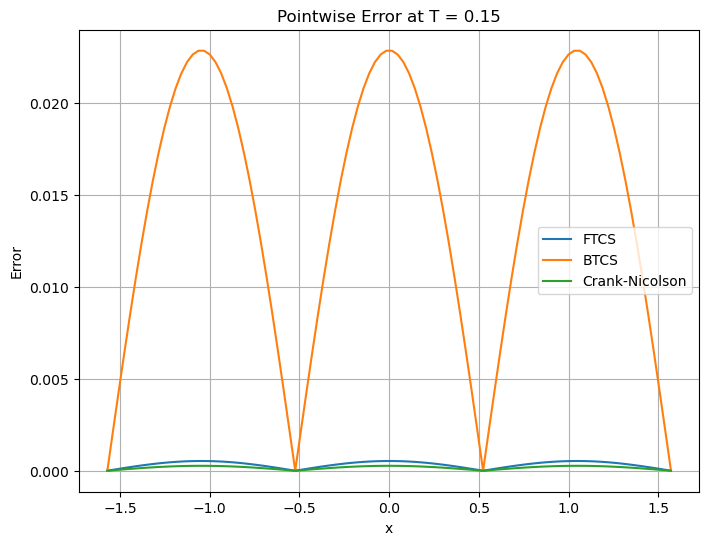

In [39]:
plt.figure(figsize=(8,6))
plt.plot(x_ftcs, err_ftcs, label='FTCS')
plt.plot(x_btcs, err_btcs, label='BTCS')
plt.plot(x_cn, err_cn,  label='Crank-Nicolson')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Pointwise Error at T = 0.15')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
x = np.linspace(x_min, x_max, 100)
print(x[99])

1.5707963267948966


Among these three schemes, CN and FTCS are two orders of magnitude preciser then BTCS scheme. CN is about two times more accurate than FTCS. Notice the time step of FTCS is about $5\times 10^{-4}$, but the time step of CN is only 0.015, which means CN can achieve similar good accuracy with significantly fewer steps.